<a href="https://www.kaggle.com/code/osmanshamso/getting-started-with-titanic-dataset-shamso-osman?scriptVersionId=186253125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic Dataset Analysis

# Introduction

This notebook aims to analyze the Titanic dataset to identify patterns and insights related to passenger survival.

We'll start with loading and familiarizing ourselves with the data, perform initial exploratory data analysis (EDA), and create visualizations to uncover key observations. 

Finally, we'll suggest further areas for investigation.

## Importing Necessary Libraries

We'll start by importing the libraries required for our analysis.

In [2]:
#importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Setup Complete")

Setup Complete


## Loading the Dataset

We'll load the Titanic dataset from the provided CSV file. This dataset contains information about the passengers, such as their age, sex, class, fare, and whether they survived.


In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Familiarization

Let's take a quick look at the dataset structure and the types of data we're dealing with.

### Summary Statistics

First, let's look at some summary statistics to get an overview of the dataset:


In [4]:
# Display summary statistics of the dataset
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data Types and Missing Values

Next, we will check the data types of the columns and the number of missing values in each column:

In [5]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Initial Visualizations

We can create some basic visualizations to identify initial insights. For example, we can look at the distribution of survival status, passenger class, and age.

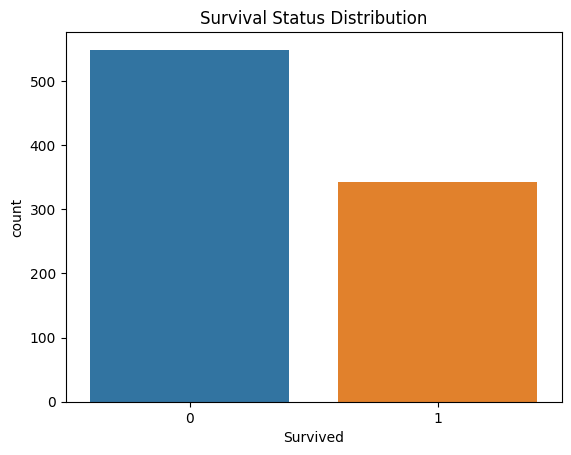

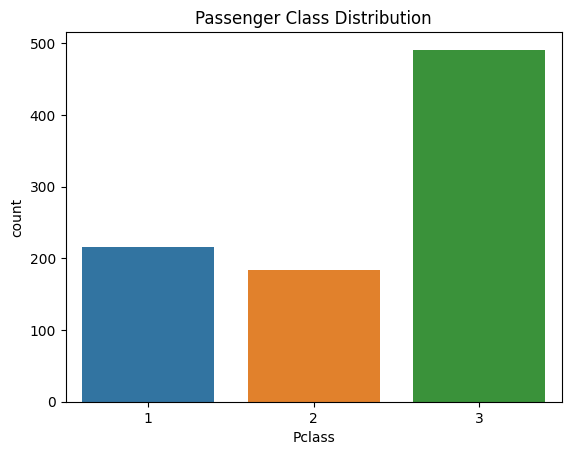

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


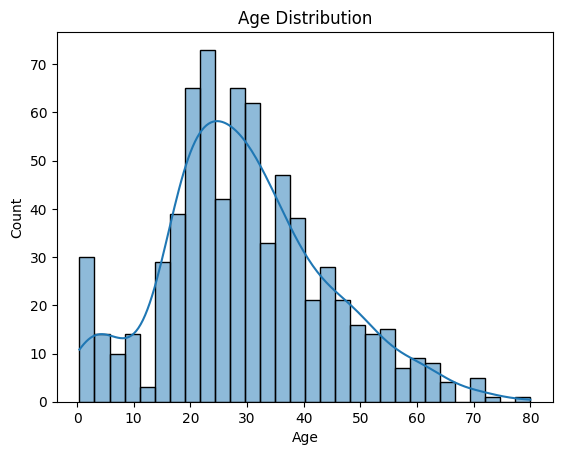

In [6]:
# Distribution of survival status
sns.countplot(x='Survived', data=df)
plt.title('Survival Status Distribution')
plt.show()

# Distribution of passenger class
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Age distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


### Insight Identification

Based on the initial exploration, we can identify the following insights:

1. **Survival Rate**: The dataset contains information about the survival status of passengers. We can observe the number of survivors and non-survivors (0 = No, 1 = Yes). Initial visualization shows that the number of non-survivors is higher than the number of survivors.

2. **Passenger Class Distribution**: We can see the distribution of passengers across different classes (1st, 2nd, 3rd). There is a higher number of passengers in the 3rd class compared to the 1st and 2nd classes.
 
3. **Age Distribution**: The age distribution of passengers can give us insights into the age demographics on the Titanic.The age distribution shows a right-skewed distribution with most passengers being young adults.


# Exploratory Data Analysis

1. Survival Rate and Passenger Class

We use a stacked bar chart for survival rates by passenger class because it clearly shows both the total passengers in each class and the proportion that survived.

<Figure size 800x600 with 0 Axes>

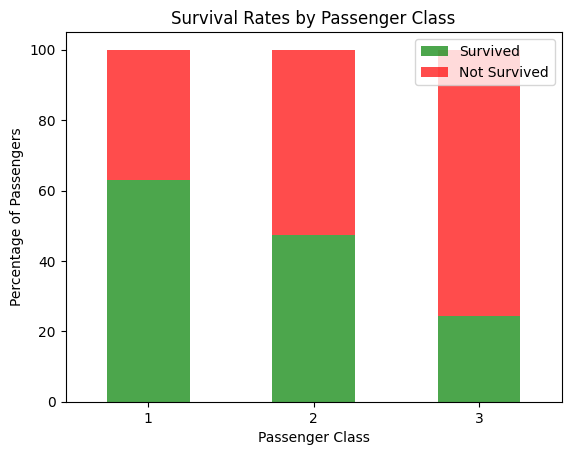

In [7]:
# Calculate survival rates by passenger class
survival_rates = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()

# Convert counts to percentages for survivors and non-survivors
survival_rates *= 100
survival_rates = survival_rates.fillna(0)  # Replace NaN with 0 for non-survivors in some classes

# Ensure columns are in the correct order for plotting
survival_rates = survival_rates[[1, 0]]  # 1 = Survived, 0 = Not Survived

survival_rates.columns = ['Survived', 'Not Survived']  # Rename columns for clarity
survival_rates['Total'] = survival_rates['Survived'] + survival_rates['Not Survived']  # Calculate total passengers for each class
survival_rates['Survival Rate'] = (survival_rates['Survived'] / survival_rates['Total']) * 100 # Calculate the percentage of survivors for each class

# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
survival_rates[['Survived', 'Not Survived']].plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)

# Adding labels and title
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage of Passengers')
plt.xticks(rotation=0)
plt.legend(['Survived', 'Not Survived'])

# Show plot
plt.show()


### Explanation:

* **Data Calculation**: We first calculate survival rates by using groupby on the Pclass column and then normalizing the counts to get percentages.

* **Plotting**: We use Matplotlib to create a stacked bar chart (kind='bar', stacked=True) where each bar represents a passenger class, and segments within each bar represent survivors (green) and non-survivors (red).

* **Labels and Legends**: Labels (title, xlabel, ylabel, legend) are added to make the chart informative and understandable.

2. Gender and Survival

We use a grouped bar chart to show the total number of survivors and non-survivors for each gender.

<Figure size 1000x600 with 0 Axes>

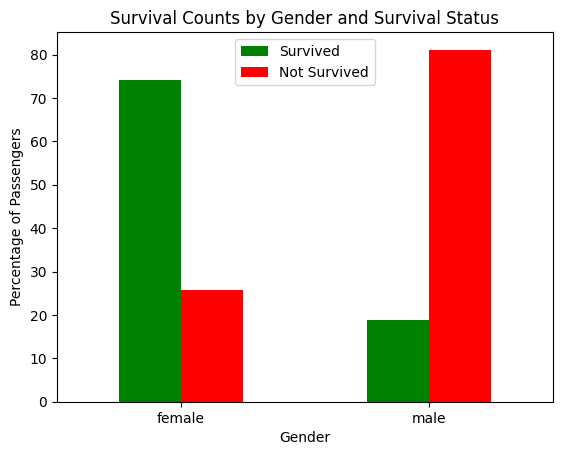

In [8]:
# Calculate survival counts or percentages by Sex and Survived
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()
survival_counts.columns = ['Not Survived', 'Survived']  # Reorder columns for clarity
survival_counts['Total'] = survival_counts.sum(axis=1)  # Calculate total passengers by gender

# Convert counts to percentages
survival_percentages = survival_counts.div(survival_counts['Total'], axis=0) * 100

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
survival_percentages[['Survived', 'Not Survived']].plot(kind='bar', stacked=False, color=['green', 'red'])

# Adding labels and title
plt.title('Survival Counts by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Percentage of Passengers')
plt.xticks(rotation=0)
plt.legend(['Survived', 'Not Survived'])

# Show plot
plt.show()


### Explanation:

* **Data Calculation**: We group the dataset by Sex and Survived, calculate counts of survivors and non-survivors, and then convert these counts into percentages.

* **Plotting**: We use Matplotlib to create a grouped bar chart (kind='bar', stacked=False) where each group of bars represents a gender (Male, Female), and within each group, bars represent survivors (green) and non-survivors (red).

* **Labels and Legends**: Labels (title, xlabel, ylabel, legend) are added to make the chart informative and understandable.

3. Age Distribution

We use a histogram for age distribution because it shows how passenger ages were spread out, revealing any peaks or unusual patterns.

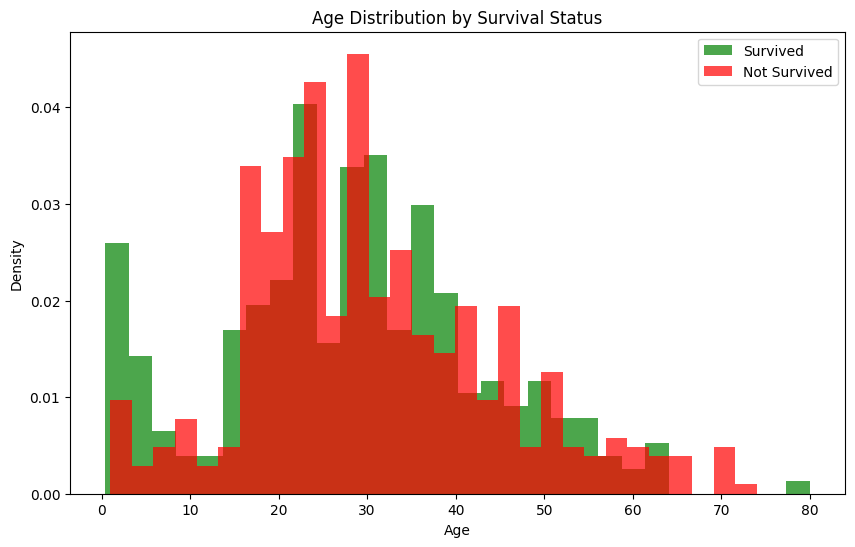

In [9]:
# Separate age data for survivors and non-survivors
survived = df[df['Survived'] == 1]['Age'].dropna()
not_survived = df[df['Survived'] == 0]['Age'].dropna()

# Plotting the histograms with overlay
plt.figure(figsize=(10, 6))
plt.hist(survived, bins=30, alpha=0.7, color='green', label='Survived', density=True)
plt.hist(not_survived, bins=30, alpha=0.7, color='red', label='Not Survived', density=True)

# Adding labels and title
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


### Explanation:

* **Data Preparation**: We filter the dataset to get age data (Age column) for survivors (Survived == 1) and non-survivors (Survived == 0). We drop missing values (dropna()) to ensure clean data for plotting.

* **Plotting**: We use Matplotlib to create histograms (plt.hist) for both survivors and non-survivors. The alpha parameter is set to 0.7 to make the histograms slightly transparent (alpha=0.7).

* **Labels and Legends**: Labels (title, xlabel, ylabel, legend) are added to make the chart informative and understandable.

4. Family Size and Survival

We use a scatter plot for family size vs. survival rate to see if there's a trend in how survival changes with family size.

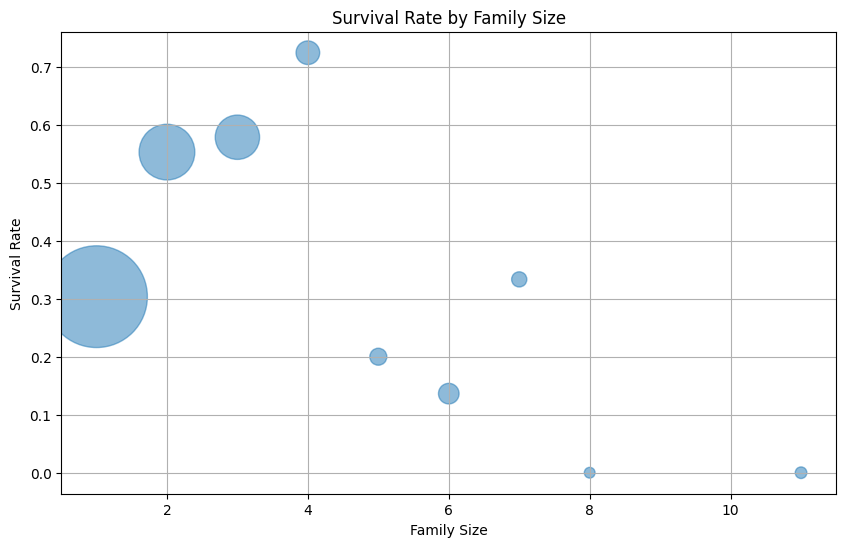

In [10]:
# Calculate family size for each passenger
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Including the passenger themselves

# Calculate survival rates and counts by family size
family_survival = df.groupby('FamilySize')['Survived'].agg(['mean', 'size']).reset_index()
family_survival.columns = ['FamilySize', 'SurvivalRate', 'PassengerCount']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(family_survival['FamilySize'], family_survival['SurvivalRate'], s=family_survival['PassengerCount']*10, alpha=0.5)

# Adding labels and title
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.grid(True)

# Show plot
plt.show()


### Explanation:

* **Data Preparation**: We calculate the FamilySize for each passenger by summing SibSp (siblings/spouses) and Parch (parents/children) columns and adding 1 to include the passenger themselves.

* **Data Calculation**: We group the dataset by FamilySize, calculate the mean survival rate (SurvivalRate) and count the number of passengers (PassengerCount) for each family size.

* **Plotting**: We use Matplotlib to create a scatter plot (plt.scatter) where each point represents a family size. The size of the point (s=) is proportional to the number of passengers with that family size (family_survival['PassengerCount']*10), and alpha=0.5 makes the points slightly transparent.

* **Labels and Legends**: Labels (title, xlabel, ylabel) are added to make the chart informative and understandable. Grid lines (plt.grid(True)) are added for better readability.

5. Fare and Survival

We use a box plot for fare distribution by survival status because it shows the median, quartiles, and any extreme values in ticket prices for survivors and non-survivors.

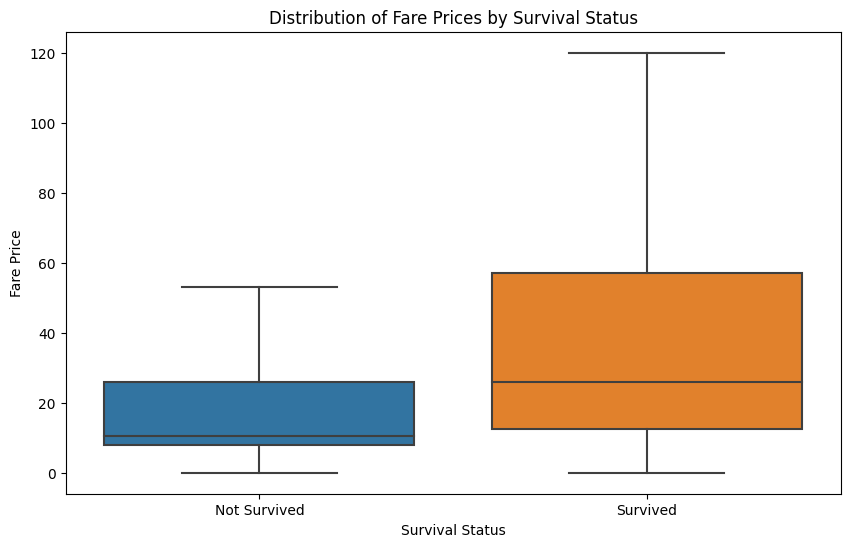

In [11]:
# Separate fare data for survivors and non-survivors
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

# Plotting the box plots side by side
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df, showfliers=False)

# Adding labels and title
plt.title('Distribution of Fare Prices by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Fare Price')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

# Show plot
plt.show()


### Explanation:

* **Data Preparation**: We filter the dataset to get fare data (Fare column) for survivors (Survived == 1) and non-survivors (Survived == 0).

* **Plotting**: We use Seaborn (sns.boxplot) to create two box plots side by side (x='Survived') where one box plot represents fare prices for non-survivors and the other for survivors. The showfliers=False parameter removes outliers for a clearer visualization.

* **Labels and Legends**: Labels (title, xlabel, ylabel) are added to make the chart informative and understandable. X-axis ticks are customized to show 'Not Survived' and 'Survived' instead of numeric values.

# Conclusion

In our initial exploration of the Titanic dataset, we have uncovered several interesting patterns and insights regarding passenger survival. Here are the key findings from our analysis:

1. Passenger Class and Survival:

* Observation: First-class passengers had a significantly higher survival rate compared to those in second and third class.
* Possible Reason: This could be due to factors such as better access to lifeboats, proximity to exit points, or preferential treatment during evacuation.

2. Age Distribution and Survival:

* Observation: There is a noticeable difference in the age distribution of survivors and non-survivors. Younger passengers, particularly children, had a higher likelihood of survival.
* Possible Reason: The policy of "women and children first" during evacuation might have contributed to this trend.

3. Family Size and Survival:

* Observation: Passengers with smaller family sizes tended to have higher survival rates. Large families faced lower survival rates.
* Possible Reason: It might have been more challenging for larger families to stay together and get everyone to safety during the chaotic evacuation process.

4. Fare Prices and Survival:

* Observation: The fare distribution shows that passengers who paid higher fares had a higher chance of survival. This is evident in the box plots comparing fare prices between survivors and non-survivors.
* Possible Reason: Higher fares are likely associated with first-class tickets, thus linking this observation to the higher survival rates observed among first-class passengers.

These initial insights provide a foundational understanding of the factors influencing passenger survival on the Titanic. However, to gain a more comprehensive picture, further investigation is needed.

## Further Areas of Investigation

* Age and Survival by Passenger Class: Investigate the relationship between age, passenger class, and survival.

* Cabin and Survival: Explore the impact of cabin numbers and decks on survival rates.

* Fare Analysis by Passenger Class: Further analyze the relationship between fare prices, passenger class, and survival.

* Name and Social Status: Explore the correlation between the title in passenger names and survival rates.